In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

: 

In [52]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [53]:
len(filenames)

44441

In [55]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [57]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.        , 0.00295297, 0.        , ..., 0.00752505, 0.02113517,
       0.00401738], dtype=float32)

In [58]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [59]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([0.        , 0.01761626, 0.001716  , ..., 0.01247231, 0.02726394,
       0.06899249], dtype=float32)

In [84]:
image_features = []
for file in filenames[0:100]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━

[array([0.        , 0.01761626, 0.001716  , ..., 0.01247231, 0.02726394,
        0.06899249], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.0099793 , 0.02375531,
        0.04649903], dtype=float32),
 array([0.        , 0.0364214 , 0.00710439, ..., 0.00140779, 0.        ,
        0.05435034], dtype=float32),
 array([0.00232171, 0.05030547, 0.00747744, ..., 0.00346683, 0.03391019,
        0.04565724], dtype=float32),
 array([0.00306835, 0.06240455, 0.        , ..., 0.00170627, 0.02032891,
        0.05833261], dtype=float32),
 array([0.        , 0.10469137, 0.00198095, ..., 0.        , 0.03033751,
        0.0271286 ], dtype=float32),
 array([0.        , 0.12438437, 0.01465612, ..., 0.00289709, 0.04055162,
        0.06534589], dtype=float32),
 array([0.        , 0.09169215, 0.01569912, ..., 0.        , 0.00503583,
        0.04560045], dtype=float32),
 array([0.        , 0.09545279, 0.01153319, ..., 0.0007301 , 0.04513261,
        0.07661063], dtype=float32),
 array([0.

In [85]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [86]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [88]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [89]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [90]:
np.array(Image_features).shape

(100, 2048)

In [109]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [110]:
neighbors.fit(Image_features)

,n_neighbors,6
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [111]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [112]:
distance,indices = neighbors.kneighbors([input_image])

In [113]:
indices[0]

array([86, 76, 79, 81, 80, 78])

In [114]:
from IPython.display import Image

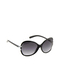

In [115]:
Image('16871.jpg')

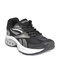

In [116]:
Image(filenames[indices[0][1]])

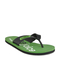

In [117]:
Image(filenames[indices[0][2]])

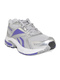

In [118]:
Image(filenames[indices[0][3]])

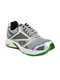

In [119]:
Image(filenames[indices[0][4]])

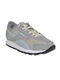

In [120]:
Image(filenames[indices[0][5]])